# CSCE 623 Homework Assignment 1
## Student Name: Marvin Newlin
## Date: 16 Apr 19



In [2]:
"""
HW1
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model, metrics

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

## STEP 1:
load Auto.csv using pandas and preprocess it (handle missing values)

In [3]:
#STEP 1

#STUDENT CODE - insert code to load Auto.csv using pandas and preprocess it (handle missing values)
# store your data in a dataframe called 'data'
#--------------------------------------------- 
csv_file = 'Auto.csv'
#From inspecting csv file, NA values are marked as '?' so we specify that in read_csv()
data = pd.read_csv(csv_file, na_values='?').dropna(how='any') #dropna(how='any') removes rows with any missing values
#---------------------------------------------    


#show the dataset was loaded by displaying first few rows
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## STEP 2:
Explore the dataset

In [4]:
#STEP 2

#STUDENT CODE - Insert code to explore the dataset here
#---------------------------------------------          
#Print dataframe statistics for all columns
data.describe(include='all')

#---------------------------------------------      

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota corolla
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


a. Dataset stats: 

    As we can see from the count fields above, after removing missing values from the dataset, there are 392 observations for each feature. There are 9 features: mpg, cylinders, displacement, horsepower, weight, accelaration, year, origin, and name. 

b. Feature descriptions:

### Begin histograms of each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab4c5bcc88>]],
      dtype=object)

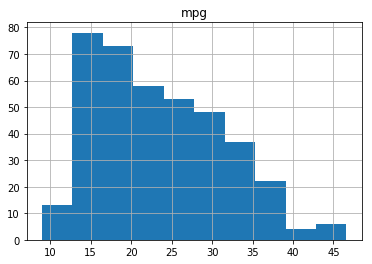

In [5]:
#mpg histogram
data.hist(column='mpg')

##### Explanation
The histogram plot shows that the mpg distribution is a skewed distribution with positive skew since the long tail is in the positive direction.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1bc97898>]],
      dtype=object)

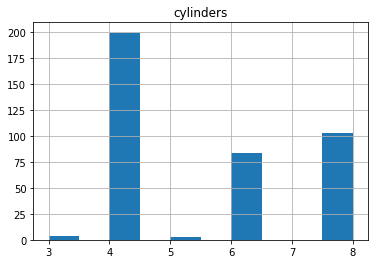

In [6]:
#cylinder histogram
data.hist(column='cylinders')

##### Explanation
Since cylinder count is a discrete value and it is within a tight range from 3-8, the best description of this would probably be a multi-modal distribution with modes at 4, 6, and 8.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b9122e8>]],
      dtype=object)

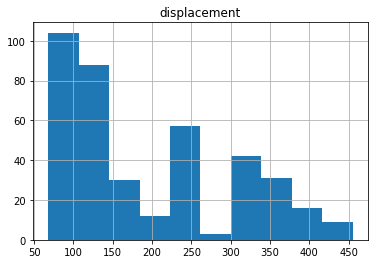

In [7]:
#displacement histogram
data.hist(column='displacement')

##### Explanation
The displacement histogram also appears to be a form of multi-modal distribution with modes around 100, 240, and 310. The units for engine displacement are generall in either liters or cubic inches. Given that most of these measurements are in the hundreds, these measurements should be in cubic inches.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b968550>]],
      dtype=object)

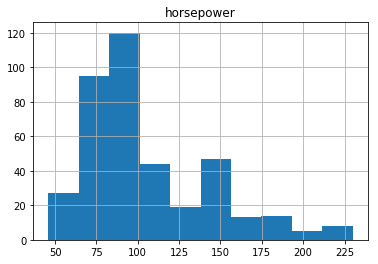

In [8]:
#horsepower histogram
data.hist(column='horsepower')

##### Explanation
The histogram for horsepower seems to show that horsepower follows a skewed distribution with positive skew given the offset of the peak value. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b8904e0>]],
      dtype=object)

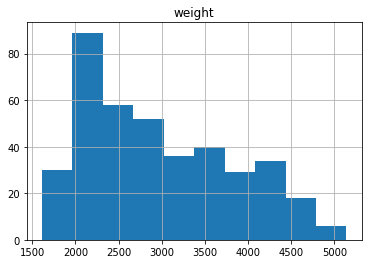

In [9]:
#weight histogram
data.hist(column='weight')

##### Explanation
The histogram for weight also shows that weight tends to follow a positive skewed distribution. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1bc95898>]],
      dtype=object)

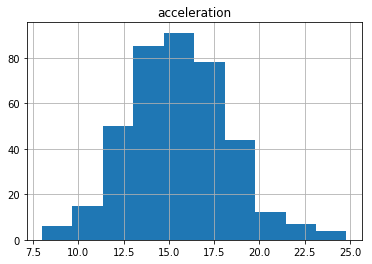

In [10]:
#accelaration histogram
data.hist(column='acceleration')

##### Explanation
The histogram for accelaration seems to be normally distributed with a mean right around 16.0 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b7be1d0>]],
      dtype=object)

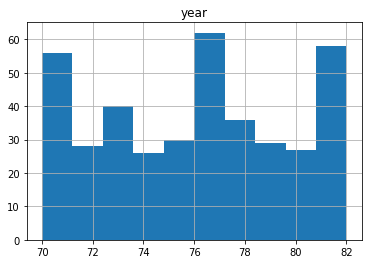

In [11]:
#year histogram
data.hist(column='year')

##### Explanation
The histogram for the year data seems to have a multimodal distribution with modes at 70, 76, and 82. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b8ca7f0>]],
      dtype=object)

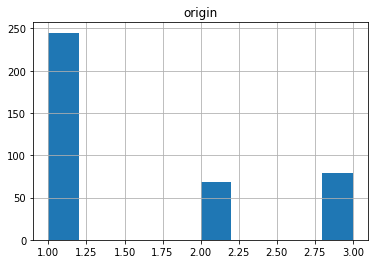

In [12]:
#origin histogram
data.hist(column='origin')

##### Explanation
The data for origin is discrete and corresponds to categories. Looking at the raw data, a 1 seems to represent American-made vehicles. A 2 represents European-made foreign vehicles. A 3 represents Asian-made foreign vehicles. 

##### Explanation of name feature
The name feature contains strings for the names of the vehicles so it isn't really possible to plot a histogram of the strings. Examining the name column of the data description from section a above, we can see some information about the names of the vehicles. Interestingly, the toyota corrola is the most frequent name for a vehicle. Hoever, another item to notice is that 301/392 of the vehicle names are unique.

c. Feature relationships:
I would expect that mpg, horsepower, acceleration, displacement, and weight all have relationships. 


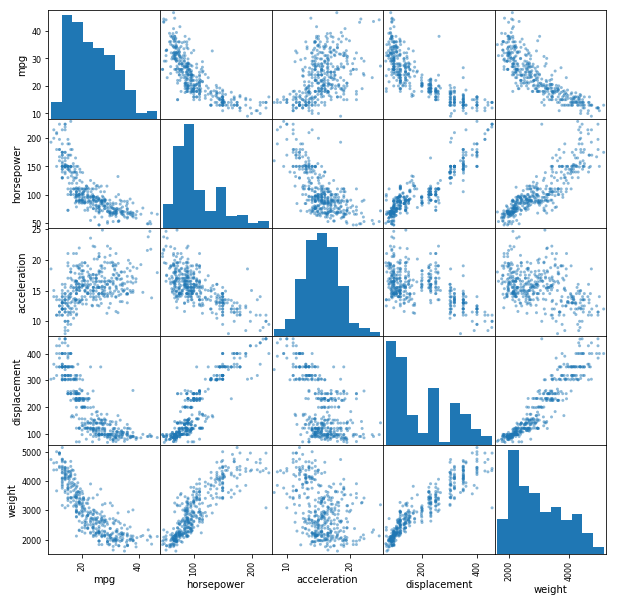

In [13]:
#Plot scatter matrix of each of the selected features
_ = scatter_matrix(data[['mpg', 'horsepower','acceleration', 'displacement', 'weight']], figsize=(10,10))

##### Explanation of relationships
###### Linear Relationships
There appears to be linear relationships between:

* horsepower and acceleration
* horsepower and displacement
* horsepower and weight
* displacement and weight

###### Non-Linear Relationships
There appears to be non-linear relationships between:
* mpg and horsepower
* mpg and weight
* mpg and displacement

###### No Relationships
There appears to be no relationships between:

* acceleration and weight
* acceleration and displacement
* acceleration and mpg

###### Strong & Weak Relationships
The relationship between weight & displacement appears to be weakly linear due to the amount of variance that we can see in the scatter plot. For example, in the displacement(x) vs. weight(y) graph, a displacement of ~2500 can have weight values from 3000-400. This occurs in several spots in the scatter plot, so while the relationship is linear, it does not appear to be a strong relationship.

There also does not appear to be a strong relationship at all between accelaration & displacement, again due to variance.

There does appear to be a stong relatinoship between displacement & horsepower, also between displacement and mpg, and additionally between weight and mpg. There is not as much variance in these plots and there are also not as many outliers.  


## STEP 3:
Make a single scatterplot of horsepower (x axis) by MPG (y axis)

Insert the value of beta1guess based on eyeballing the graph

Guess for $\beta_1$ = -0.150000

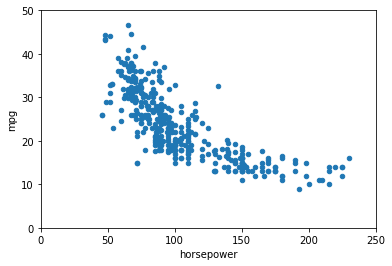

In [14]:
#STEP 3:

beta0 = 40.

#STUDENT CODE - Make a single scatterplot of horsepower (x axis) by MPG (y axis) 
# Insert the value of beta1guess based on eyeballing the graph
#---------------------------------------------  
data.plot(kind='scatter', x='horsepower', y='mpg', xlim=[0,250], ylim=[0,50])


beta1guess = -0.15 #an eyeball best fit line appears to be (0,40) and (200,10) so -30/200 is slope guess
#--------------------------------------------- 

md(r"Guess for $\beta_1$ = %f" %beta1guess)

## STEP 4:
Make a `numpy` array of possible $\beta_1$ values(`beta1bracket`) surrounding your guess $\beta_1$ for to test & display the values you chose

In [15]:
#STEP 4

#STUDENT CODE - Insert code to make a set of possible beta1 values to test & display the values you chose
#---------------------------------------------          
beta1bracket = np.linspace(beta1guess-0.05, beta1guess+0.05, num=50)
print(beta1bracket)
#--------------------------------------------- 



[-0.2        -0.19795918 -0.19591837 -0.19387755 -0.19183673 -0.18979592
 -0.1877551  -0.18571429 -0.18367347 -0.18163265 -0.17959184 -0.17755102
 -0.1755102  -0.17346939 -0.17142857 -0.16938776 -0.16734694 -0.16530612
 -0.16326531 -0.16122449 -0.15918367 -0.15714286 -0.15510204 -0.15306122
 -0.15102041 -0.14897959 -0.14693878 -0.14489796 -0.14285714 -0.14081633
 -0.13877551 -0.13673469 -0.13469388 -0.13265306 -0.13061224 -0.12857143
 -0.12653061 -0.1244898  -0.12244898 -0.12040816 -0.11836735 -0.11632653
 -0.11428571 -0.1122449  -0.11020408 -0.10816327 -0.10612245 -0.10408163
 -0.10204082 -0.1       ]


## STEP 5:
Compute the sum of squared residual errors (RSS) under each possible beta1bracket member

In [16]:
#STEP 5

#STUDENT CODE - Insert code to compute the sum of squared residual errors (RSS) under each possible beta1bracket member.
#---------------------------------------------
# Function for computing RSS from beta0, beta1, x, and y
def rss1d(beta0,beta1,x,y):
    yhat = beta0 + beta1*x
    ydiff = y - yhat
    rss = np.dot(ydiff.T,ydiff)
    return rss

rss_all = []
x = data['horsepower']
y = data['mpg']
i = 0
minimum_rss = 1000000
min_beta1 = 0
for beta in beta1bracket:
    rss = rss1d(beta0, beta, x, y)
    rss_all.append(rss)
    if rss < minimum_rss:
        minimum_rss = rss
        min_beta1 = beta
rss_all = np.array(rss_all)
#--------------------------------------------- 

## STEP 6:
Make a new plot of $\beta_1$ values on the x axis and RSS cost on the y axis (computed in step 5). 
Label your axes and use math fonts in your labels 

Minimum RSS:  9389.203090379007  
Corresponding beta value:  -0.15918367346938778


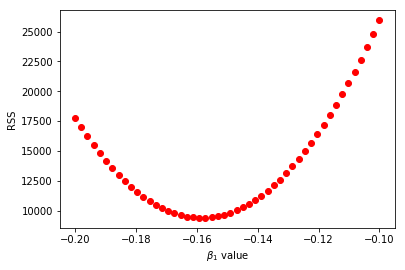

In [17]:
#STEP 6

#STUDENT CODE - make a new plot of beta_1 values on the x axis and RSS cost on the y axis (computed in step 5). 
#label your axes and use math fonts in your labels if possible
#---------------------------------------------          
plt.xlabel(r"$\beta_1$ value")
plt.ylabel(r"RSS")
plt.plot(beta1bracket, rss_all, 'ro')

#Print minimum RSS and corresponding beta_1 value
print("Minimum RSS: ", minimum_rss, " \nCorresponding beta value: ", min_beta1)
#--------------------------------------------- 

# STEP 7:   
Describe the RSS Plot

## Student Answers

### What is the shape of the plot in step 6?  
The shape of the plot is a parabola. This is to be expected since we are plotting a squared value. 

### Using the plot, how might someone find the best value of $\beta_1$:  
The best value for $\beta_1$ occurs when RSS is minimized, i.e. the slope of the RSS curve is 0. This happens right around the $\beta_1$ value -0.16

### Select & report value of $\beta_1$ you think will have the best fit (you may want to improve your estimate by exploring near it by adding additional values for $\beta_1$  and repeat steps 3-5):  
Inspecting my array of beta values, I saw one that was about -0.159, so to confirm my suspicion, in the code for step 6 I inserted a minimum RSS check and have it output the corresponding $\beta_1$. The best value of $\beta_1$ is -0.15918367346938778




## STEP 8:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis)

Add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1

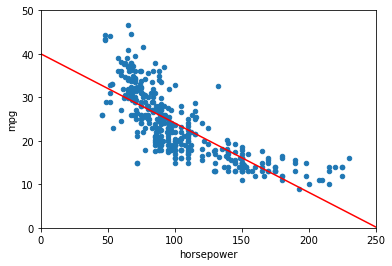

In [18]:
#STEP 8

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the fixed beta0=40 and your best choice for beta1 
#---------------------------------------------
data.plot(kind='scatter', x='horsepower', y='mpg', xlim=[0,250], ylim=[0,50])
x_axis = np.linspace(0,250)
guess_line = beta0 + min_beta1*x_axis
plt.plot(x_axis,guess_line,'r-')
#--------------------------------------------- 


## STEP 9:
Implement equation 3.4 on page 62 to develop the closed-form function `computeBetas(xVec, yVec)` 
which accepts a column vector of x values and a column vector of y values and returns betas, 
which is a structure containing the values for the 2 coefficients $\beta_0$ and $\beta_1$  

In [19]:
#STEP 9

#STUDENT CODE - In code, implement equation 3.4 on page 62 to develop the closed-form function computeBetas(xVec, yVec) 
# which accepts a column vector of x values and a column vector of y values and returns betas, 
# which is a structure containing the values for the 2 coefficients beta0 and beta1  
#---------------------------------------------          
def computeBetas(xVec, yVec):
    xbar = xVec.mean()     # x_bar vector
    ybar = yVec.mean()     # y_bar vector
    xhat = xVec - xbar     # vector of all the x_hat_i's minus the 
    yhat = yVec - ybar     # vector of the difference between y_hat and y_bar
    b1_num = np.dot(xhat.T, yhat) # The sum from the equation is sum representation of this vector multiplication
    b1_den = np.dot(xhat.T, xhat) # Sum from equation denominator. Also can be represented with vector mult.
    beta_1hat = b1_num/b1_den   
    beta_0hat = ybar - beta_1hat*xbar # equation for beta0
    return (beta_0hat, beta_1hat)
             
#--------------------------------------------- 

## STEP 10:
Compute and display best $\beta_0$ (`beta0best`) and $\beta_1$ (`beta1best`) for the Auto Dataset by calling the closed-form function in step 9

In [20]:
#STEP 10
#STUDENT CODE - Compute beta0best and beta1best for the Auto Dataset by calling the closed-form function in step 9
#--------------------------------------------- 
bestBetas = computeBetas(data['horsepower'], data['mpg'])
beta0best = bestBetas[0]
beta1best = bestBetas[1]

print("beta0best: ",beta0best, " \nbeta1best: ", beta1best)
#--------------------------------------------- 

beta0best:  39.935861021170474  
beta1best:  -0.15784473335365365


## STEP 11:

### Student Answer

#### How does the closed form computed value of $\beta_1$ compare with your estimate of $\beta_1$ from step 6?   Discuss: 

The $\beta_0$ value is almost exactly 40, which makes sense. The $\beta_1$ value is actually less negative than the estimate that I had. My two closest estimates were -0.159 and -0.1571. However, even though the -0.1571 $\beta_1$ value was closer to the closed form solution value, the residual error made the -0.159 $\beta_1$ estimate a better estimate with respect to minimizing RSS.

## STEP 12:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the $\beta_0$ and $\beta_1$ you determined in step 10

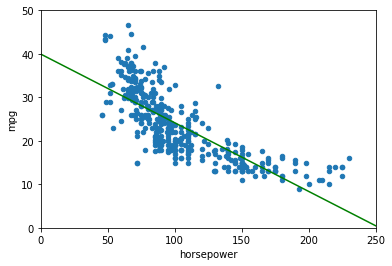

In [21]:
#STEP 12

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the beta0 and beta1 you determined in step 10 
#---------------------------------------------          
data.plot(kind='scatter', x='horsepower', y='mpg', xlim=[0,250], ylim=[0,50])
closed_form_line = beta0best + beta1best*x_axis #Using same x_axis from step 8
plt.plot(x_axis,closed_form_line,'g-')
#--------------------------------------------- 

## STEP 13:
Use sklearn's linear model function to fit a linar model from horsepower to mpg. Then display the coefficients, MSE and explained variance score.

In [22]:
#STEP13

#STUDENT CODE - Use sklearn's linear model function to fit a linear model from horsepower to mpg. 
# also, display the coefficients, MSE and explained variance score
#---------------------------------------------  
hp = data['horsepower']
mpg = data['mpg']
hp_X = np.vstack((np.ones(len(hp)),hp)).T  #Design matrix for horsepower  
regression = linear_model.LinearRegression()
regression.fit(hp_X,mpg) # fit the model
hp_predict = regression.predict(hp_X) #Create predicted mpg values
lr_beta0 = regression.intercept_      # Beta0 value from the model
lr_beta1 = regression.coef_[1]        # Beta1 value from the model
lr_r_squared = regression.score(hp_X, mpg) # R Squared score from the model
lr_mse = metrics.mean_squared_error(hp_predict, mpg) # Model MSE
display(md(r"$\beta_0$: %f" %lr_beta0)) 
display(md(r"$\beta_1$: %f" %lr_beta1))
display(md("MSE: %.3f" %lr_mse))
display(md(r"$R^2 \mbox{ (variance score)}$: %.5f" %lr_r_squared))

#--------------------------------------------- 

$\beta_0$: 39.935861

$\beta_1$: -0.157845

MSE: 23.944

$R^2 \mbox{ (variance score)}$: 0.60595

The statistics for the linear model from scikit-learn are displayed below. The values for $\beta_0$ and $\beta_1$ are nearly identical to the closed form solution values. The two sets of values are equivalent out to 5 decimal places. 

The MSE is  relatively low, 23.944 for a model with nearly 400 datapoints seems to be a relatively low MSE. 

The $R^2$ score is about 0.606. An $R^2$ score of 1 would be a perfect score so a score 0.606 means that the model explains a majority of the variance but not all of it.

## STEP 14:
Build a new scatterplot with horsepower(x axis) vs MPG (y axis), then add a line to the plot - the linear regression line implied by the sklearn model determined in step 13

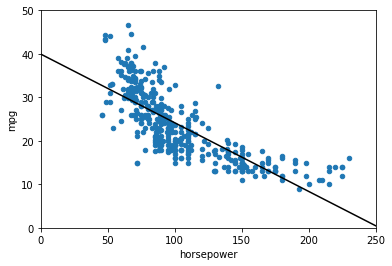

In [23]:
#STEP 14

#STUDENT CODE - Build a new scatterplot with horsepower(x axis) vs MPG (y axis)
# add a line to the plot - the linear regression line implied by the sklearn model determined in step 13 
#---------------------------------------------          
data.plot(kind='scatter', x='horsepower', y='mpg', xlim=[0,250], ylim=[0,50])
lin_model_line = lr_beta0 + lr_beta1*x_axis #Using same x_axis from step 8 and step 12
plt.plot(x_axis,lin_model_line,'k-')
#--------------------------------------------- 

## STEP 15a:
Compute the residual errors in predicting mpg from horsepower.  Plot these residual errors as a function of horsepower using a scatterplot.  Add a horizontal line at y=0 to indicate the zero-error position.

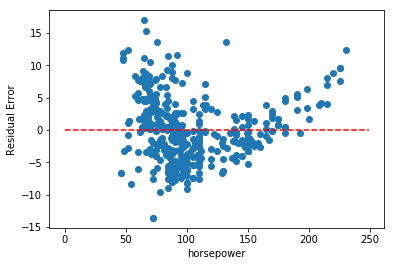

In [24]:
#STUDENT CODE

#---------------------------------------------  
lin_model_residual_error = mpg - hp_predict # Residual = yi - y_hat_i
#Plot values
plt.xlabel('horsepower')
plt.ylabel('Residual Error')
plt.scatter(x=hp, y=lin_model_residual_error)
plt.plot(np.zeros(250), 'r--')


#---------------------------------------------      

## STEP 15b

### Describe the plot - particularly the trends.  

The residual plot actually appears to follow a somewhat parabolic pattern with a heavy cluster in the bottom left.

### Do the errors appear well-distributed, or are there trends?  

The errors seem to be heavily concentrated in the mpg = [75,100] and residual = [-10,5] range. There does appears to be a pattern/trend in the residual

### If there are trends: 

> 
1. Describe the trends,  
   There appears to be a somewhat parabolic relationship between the residual errors and the mpg values. As stated above, there is a heavy concentration of the residuals in the $mpg = [75,100]$ and $residual = [-10,5]$ range.
   
   
1. Explain what these trends indicate about the ability to predict mpg from horsepower using a linear model, 

   Since there is a pattern to the residuals, per the textbook, the relationship between mpg and horsepower is non-linear. Looking back at the original scatterplot of horsepower vs. mpg, I would actually be more inclined to say that there is a reciprocal term in the actual model relationship as there seems to be a sort of asymptote for mpg at around the $mpg = 10$ mark.
   

1. Give at least one course of action you could take to make a better model.

  There are a couple of options for a better fitting model. The first, still using ordinary least squares regression, would be to include a $\frac{1}{horsepower}$ term in the model. There appears to be a semi-reciprocal relationship between mpg and horsepower so I think that including this term could increase model fit. 
  
  Another option would be to use a different method altogether, like KNN regression. Since the relationship here is nonlinear, it would probably provide a better fit for the data. 